<h1><center> Brain Stroke Classification </center></h1>

### **Problem Statement:**
Predict whether the given observation has brain stroke or not based on various features of that observation.

### **About Dataset**
The dataset used here is open-sourced data for public usage got from kaggle. You can explore [here](https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset)

### Features Information
1) gender: "Male", "Female" or "Other" \
2) age: age of the patient \
3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension \
4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease \
5) evermarried: "No" or "Yes" \
6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban" \
8) avgglucoselevel: average glucose level in blood \
9) bmi: body mass index \
10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* \

### Target Information
11) stroke: 1 if the patient had a stroke or 0 if not



<h2><center> Importing Libraries and Loading Data </center></h2>

In [ ]:
import numpy as np #numerical python to work with  array maths
import pandas as pd #data manipulations and analysis lib
import os #os dependable functions
import matplotlib.pyplot as plt #data viz
import seaborn as sns #data viz
from collections import Counter #containers to store data
import missingno as mno #missing data exploration

#to ignore warnings from any libs
import warnings
warnings.filterwarnings("ignore")

#ML related imports from scikit-learn
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
#loading dataset using kaggle api
!pip install kaggle
! mkdir ~/.kaggle /content/full-filled-brain-stroke-dataset
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d zzettrkalpakbal/full-filled-brain-stroke-dataset
! unzip /content/full-filled-brain-stroke-dataset.zip -d /content/full-filled-brain-stroke-dataset/

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  0% 0.00/52.1k [00:00<?, ?B/s]
100% 52.1k/52.1k [00:00<00:00, 24.3MB/s]
Archive:  /content/full-filled-brain-stroke-dataset.zip
  inflating: /content/full-filled-brain-stroke-dataset/full_data.csv  
  inflating: /content/full-filled-brain-stroke-dataset/full_filled_stroke_data (1).csv  


In [ ]:
#read data from csv
data = pd.read_csv("/content/full-filled-brain-stroke-dataset/full_data.csv")
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Data Exploration

In [ ]:
#let's explore all about dataset attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
#basic statistics of data (includes only numerical columns from dataset)
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [ ]:
#Let's explore categorical columns from data
print('Gender: {}'.format(data['gender'].unique()))
print('ever_married: {}'.format(data['ever_married'].unique()))
print('work_type: {}'.format(data['work_type'].unique()))
print('Residential_type: {}'.format(data['Residence_type'].unique()))
print('smoking_status: {}'.format(data['smoking_status'].unique()))

Gender: ['Male' 'Female']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children']
Residential_type: ['Urban' 'Rural']
smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


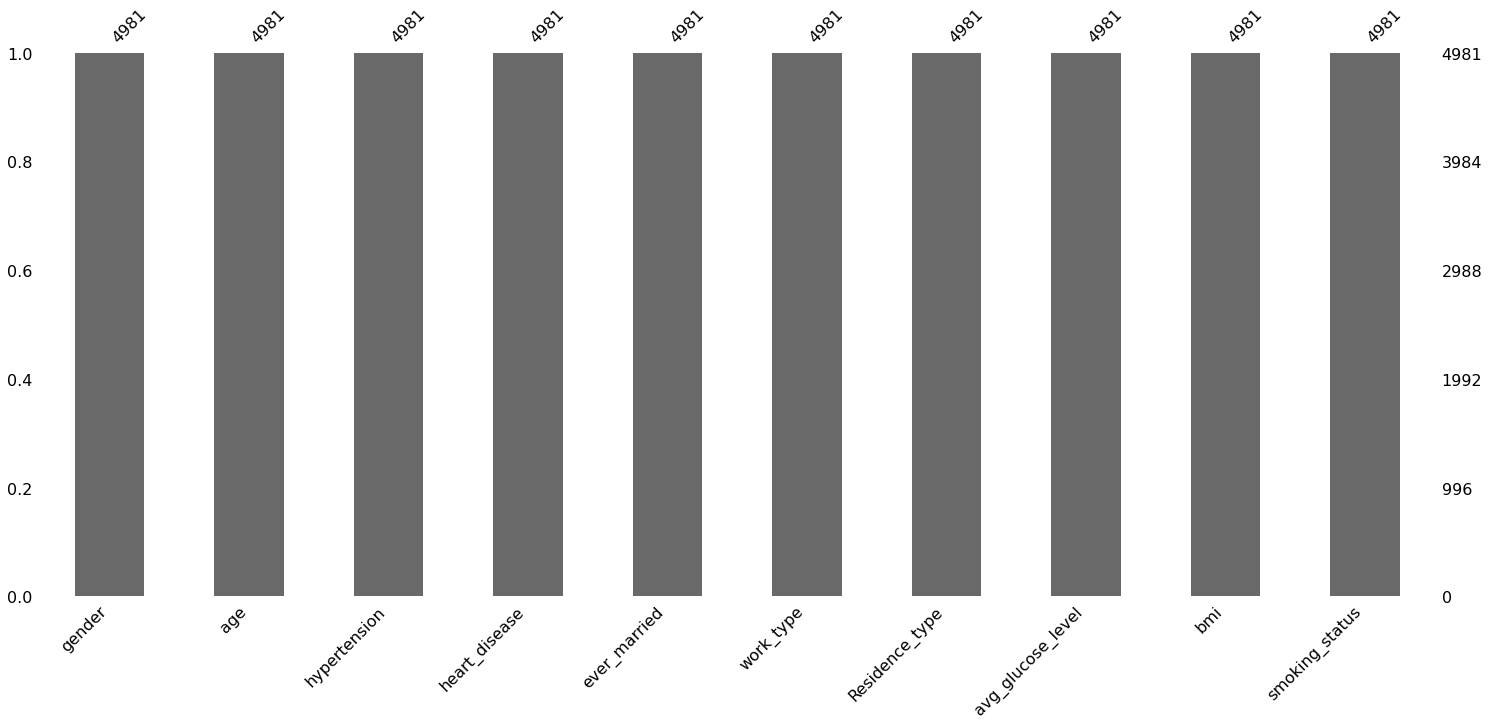

In [ ]:
mno.bar(data.drop('stroke', axis='columns'))

# Data Vizualization

Text(0.5, 1.0, 'Gender Stroke Proportion')

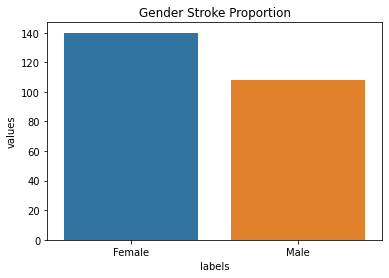

In [ ]:
gender = data.groupby(data['gender'])['stroke'].sum()
gender_df = pd.DataFrame({'labels': gender.index,
                          'values': gender.values})

sns.barplot(x='labels',y='values',data = gender_df)
plt.title("Gender Stroke Proportion")

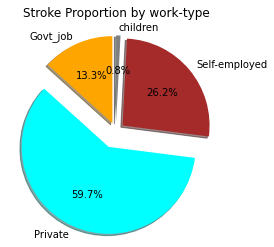

In [ ]:
work_type = data.groupby(data['work_type'])['stroke'].sum()
worktype_df = pd.DataFrame({'labels': work_type.index,
                          'values': work_type.values})

colors = ( "orange", "cyan", "brown",
          "grey")
fig1, ax1 = plt.subplots()
explode = (0.1, 0.2, 0.1, 0.1)

ax1.pie(worktype_df['values'], colors = colors, explode=explode, labels=worktype_df['labels'],autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Stroke Proportion by work-type")

plt.show()

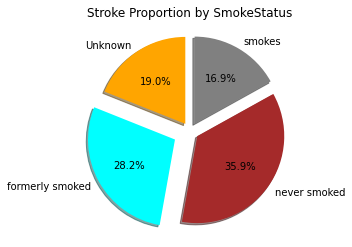

In [ ]:
smoke = data.groupby(data['smoking_status'])['stroke'].sum()
df_smoke = pd.DataFrame({'labels': smoke.index,
                   'values': smoke.values
                  })

colors = ( "orange", "cyan", "brown",
          "grey")
fig1, ax1 = plt.subplots()
explode = (0.1, 0.2, 0.1, 0.1)

ax1.pie(df_smoke['values'], colors = colors, explode=explode, labels=df_smoke['labels'],autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Stroke Proportion by SmokeStatus")

plt.show()

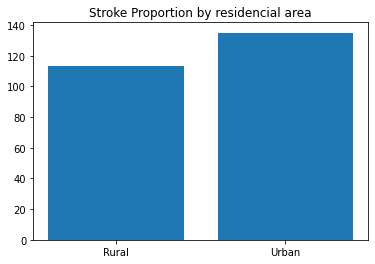

In [ ]:
Residence = data.groupby(data['Residence_type'])['stroke'].sum()
df_Residence = pd.DataFrame({'labels': Residence.index,
                   'values': Residence.values
                  })

fig1, ax1 = plt.subplots()
ax1.bar(x = df_Residence['labels'], height = df_Residence['values'])
plt.title('Stroke Proportion by residencial area')
plt.show()

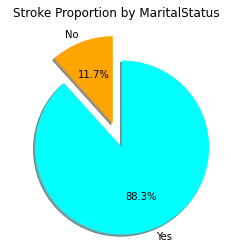

In [ ]:
Married = data.groupby(data['ever_married'])['stroke'].sum()
df_Married = pd.DataFrame({'labels': Married.index,
                   'values': Married.values
                  })

colors = ( "orange", "cyan")
fig1, ax1 = plt.subplots()
explode = (0.1, 0.2)

ax1.pie(df_Married['values'], colors = colors, explode=explode, labels=df_Married['labels'],autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Stroke Proportion by MaritalStatus")

plt.show()

Text(0.5, 1.0, 'Stroke Ages')

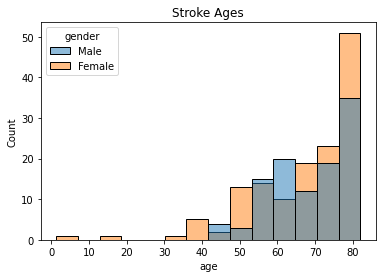

In [ ]:
stroke = data.loc[data['stroke']== 1].reset_index()

stroke["male_age"]=stroke[stroke["gender"]=="Male"]["age"]
stroke["female_age"]=stroke[stroke["gender"]=="Female"]["age"]

sns.histplot(
    stroke,
    x = 'age',
    hue = 'gender'
)
plt.title('Stroke Ages')

# Data Pre-processing

In [ ]:
#handling categrical values as model only consumes numerical values

data['ever_married'] = [0 if i != 'Yes' else 1 for i in data['ever_married']]
data['gender'] = [0 if i != 'Female' else 1 for i in data['gender']]

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
2,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
3,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1
4,0,81.0,0,0,1,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
#there are still some more categorical values where we try to get dummies or numerical value for each category
data = pd.get_dummies(data, columns = ['work_type', 'Residence_type','smoking_status'])

data.sample(5)

,gender,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
946,0,75.0,0,0,1,105.63,28.2,0,0,1,0,0,0,1,0,0,0,1
36,0,82.0,0,1,1,144.90,26.4,1,0,1,0,0,0,1,0,0,0,1
1245,1,40.0,0,0,0,78.04,32.4,0,0,1,0,0,0,1,0,0,0,1
471,1,31.0,0,0,1,80.79,28.7,0,0,1,0,0,1,0,1,0,0,0
4373,1,65.0,0,0,1,80.42,29.4,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
#let's explore for any null values
data.isnull().any()

gender                            False
age                               False
hypertension                      False
heart_disease                     False
ever_married                      False
avg_glucose_level                 False
bmi                               False
stroke                            False
work_type_Govt_job                False
work_type_Private                 False
work_type_Self-employed           False
work_type_children                False
Residence_type_Rural              False
Residence_type_Urban              False
smoking_status_Unknown            False
smoking_status_formerly smoked    False
smoking_status_never smoked       False
smoking_status_smokes             False
dtype: bool

In [ ]:
#Target value counts
data.stroke.value_counts()

0    4733
1     248
Name: stroke, dtype: int64

# Data Splitting and Model Building

In [ ]:
# data splitting
features = data.drop(['stroke'], axis=1)
target = data['stroke']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.33, random_state=42)

print('Train Size: {}\n Test Size: {}'.format((X_train.shape, y_train.shape), (X_test.shape, y_test.shape)))

Train Size: ((3337, 17), (3337,))
 Test Size: ((1644, 17), (1644,))


In [ ]:
'''
as the data we have imbalanced target which we need to sample so that the output will never be skewed
and our algorithm will able to classify correctly.
'''
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(features, target)
print(sorted(Counter(y_under).items()))

X_train_rs, X_test_rs, y_train_rs , y_test_rs = train_test_split(X_under,y_under, test_size = 0.33, random_state = 43)
X_train_rs.shape, X_test_rs.shape

[(0, 248), (1, 248)]


((332, 17), (164, 17))

In [ ]:
#build, tune and print confusion matrix

rfc = RandomForestClassifier()
n_estimators = [90,100,115,130, 200]
max_depth = range(2,20,1)
min_samples_split = range(2,10,1)
min_samples_leaf = range(1,10,1)
criterion = ['gini']
param = dict(n_estimators = n_estimators, max_depth = max_depth,
              min_samples_split = min_samples_split,
             min_samples_leaf = min_samples_leaf,
             criterion = criterion)
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = param, cv = 5, verbose=2, random_state=42)
rfc_random.fit(X_train_rs, y_train_rs)

y_pred_rfc_random = rfc_random.predict(X_test_rs)
print(confusion_matrix(y_test_rs,y_pred_rfc_random))
print('The accuracy is: {:.4f}'.format(accuracy_score(y_test_rs,y_pred_rfc_random)))
print('The classification report is:\n{:}'.format(classification_report(y_test_rs,y_pred_rfc_random)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.2s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criterion=gini, max_depth=16, min_samples_leaf=9, min_samples_split=8, n_estimators=90; total time=   0.1s
[CV] END criteri

# Vizualise Out Predictions

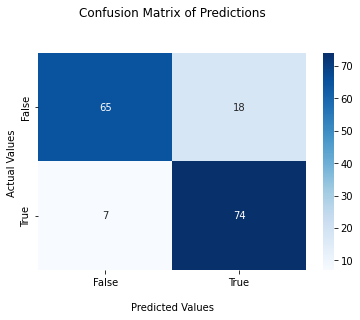

In [ ]:
ax = sns.heatmap(confusion_matrix(y_test_rs,y_pred_rfc_random),
            annot = True, cmap='Blues')

ax.set_title('Confusion Matrix of Predictions\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

From the above confusion matrix we can infer that among *72* False values we have predicted *65* properly. Similarly among *92* True values we have Predicted *74* correctly.